In [162]:
!pip install -U sentence-transformers
!pip install googletrans==3.1.0a0
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from googletrans import Translator
from scipy import spatial
from nltk.sentiment import SentimentIntensityAnalyzer
import requests, json, pandas as pd, matplotlib.pyplot as plt, numpy as np, nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Fetch Articles Titles from Google News API

In [36]:
url = "https://newsapi.org/v2/top-headlines?country=fr&apiKey=d386f3d4b8794670b61afda6517247c4"
response = requests.get(url)
response.status_code

200

In [83]:
content = json.loads(response.content)
articles = content['articles']

titles = []

for article in articles:
  buffer = article['title'].split(' - ')
  titles.append({
      'title': " ".join(buffer[:-1]),
      'media': buffer[-1]
  })

print(len(titles))
titles

20


[{'media': 'Eurosport FR',
  'title': "Premier League : Chelsea annonce son rachat imminent par un groupe mené par Todd Boehly pour 4,97 milliards d'euros"},
 {'media': 'Le 10 Sport',
  'title': 'Mercato PSG : La décision de Kylian Mbappé est imminente !'},
 {'media': 'Ouest-France',
  'title': "Accident à la Foire du trône de Paris : un homme décède percuté par le wagon d'un manège"},
 {'media': 'franceinfo',
  'title': 'Agressions en série, mauvaise blague ou psychose collective ? Le mystère des piqûres en boîte de nuit intrigue'},
 {'media': 'franceinfo',
  'title': 'Législatives 2022 : on vous explique tout sur la Nouvelle Union populaire écologique et sociale, conclue entre'},
 {'media': 'Les Numériques',
  'title': 'Test Samsung Galaxy A33 5G : un smartphone abordable et plutôt polyvalent'},
 {'media': 'Closer France',
  'title': '"La performance de sa vie" : les avocats de Johnny Depp détruisent Amber Heard après ses propos choc lors du procès'},
 {'media': 'Le Monde',
  'title'

In [61]:
# translate titles
translator = Translator()

for title in titles:
  title['title'] = translator.translate(title['title'], src='fr', dest='en').text.lower()

titles[:2]

[{'media': 'Eurosport FR',
  'title': 'premier league: chelsea announces its imminent takeover by a group led by todd boehly for 4.97 billion euros'},
 {'media': 'Le 10 Sport',
  'title': 'mercato psg: kylian mbappé decision is imminent!'}]

In [63]:
en_titles = [title['title'] for title in titles]
en_titles[:2]

['premier league: chelsea announces its imminent takeover by a group led by todd boehly for 4.97 billion euros',
 'mercato psg: kylian mbappé decision is imminent!']

In [133]:
_model = "sentence-transformers/bert-base-nli-mean-tokens"
model = SentenceTransformer(_model)

embeddings = model.encode(en_titles)
embeddings.shape

(20, 768)

In [135]:
def cosine(l1, l2):
  return round(1 - spatial.distance.cosine(l1, l2), 8)

def avg(li):
  return sum(li)/len(li)

In [141]:
mean_similarities = []
similarities = []

for embed1 in embeddings:
  buffer = []
  for embed2 in embeddings:
    if not np.array_equal(embed1, embed2):
      buffer.append(cosine(embed1, embed2))
  similarities.append(buffer)
  mean_similarities.append(avg(buffer))

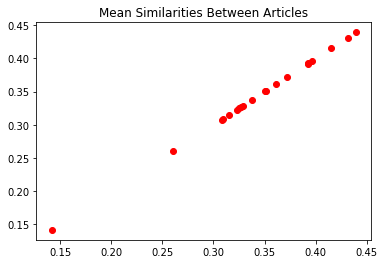

In [138]:
plt.title("Mean Similarities Between Articles")
plt.scatter(similarities, similarities, color='r')

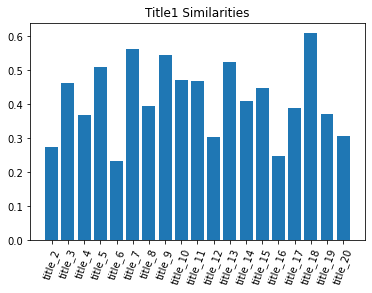

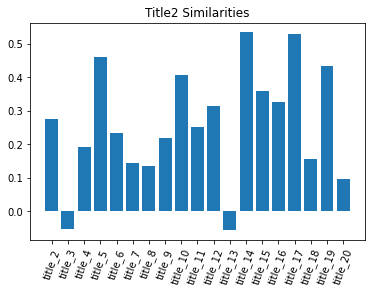

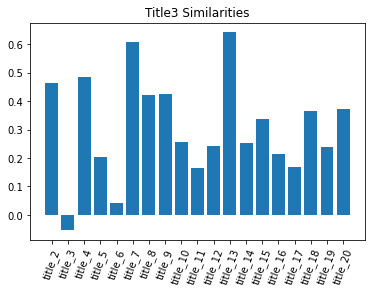

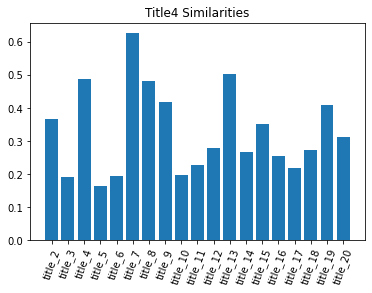

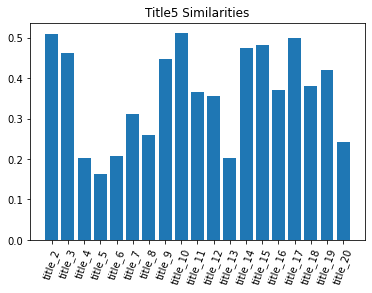

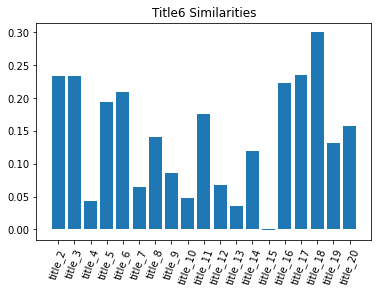

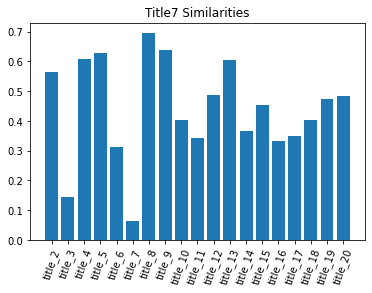

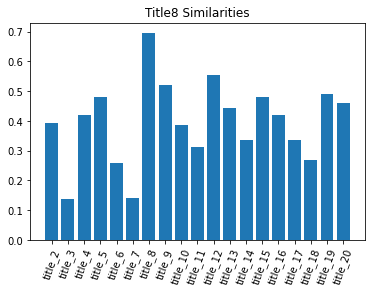

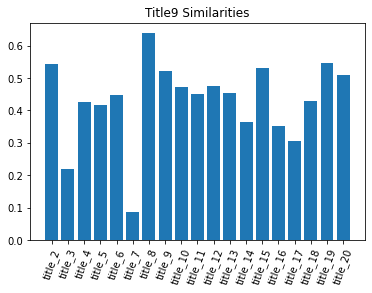

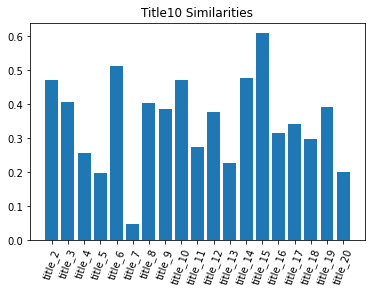

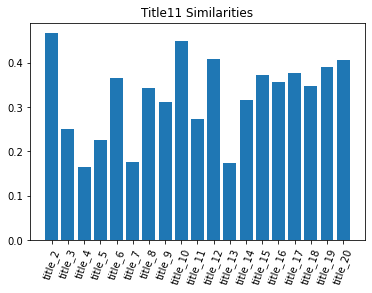

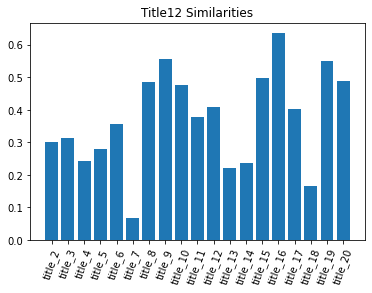

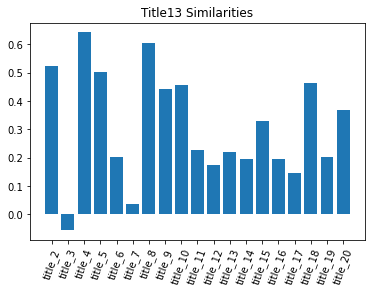

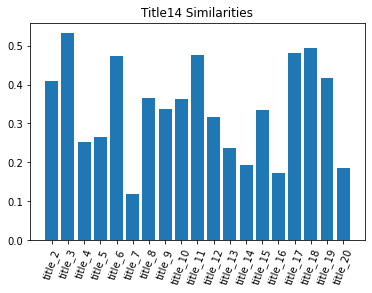

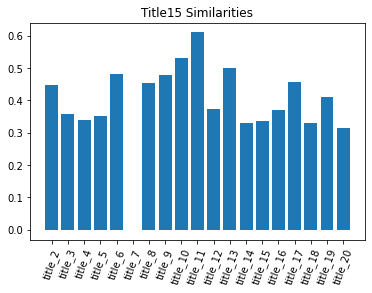

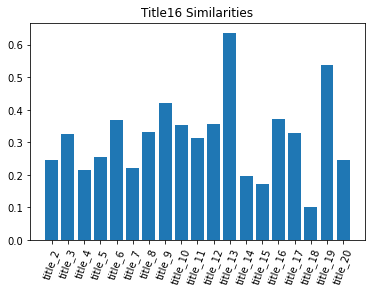

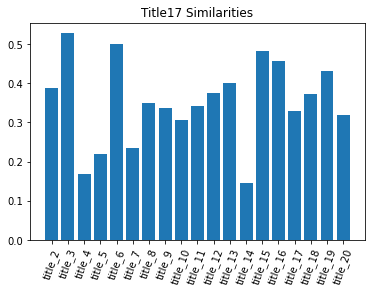

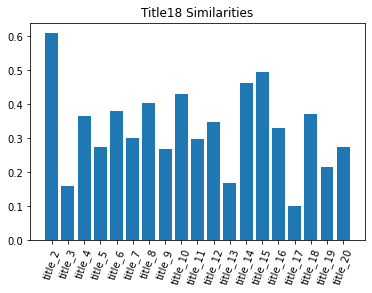

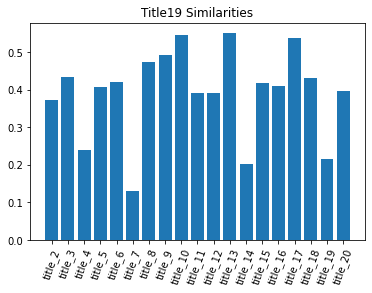

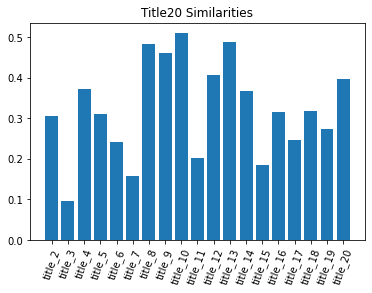

In [147]:
labels = ['title_'+str(i) for i in range(2, 21)]
for i in range(0, len(similarities)):
  plt.title(f"Title{i+1} Similarities")
  plt.bar(labels, similarities[i])
  plt.xticks(rotation=70)
  plt.show()

In [168]:
# sentiment analysis
sia = SentimentIntensityAnalyzer()
neg, neu, pos, compound = [], [], [], []
for title in en_titles:
  scores = sia.polarity_scores(title)
  neg.append(scores['neg'])
  neu.append(scores['neu'])
  pos.append(scores['pos'])
  compound.append(scores['compound'])

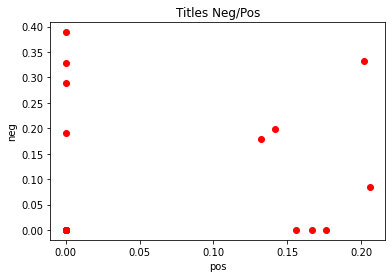

In [171]:
plt.title(f"Titles Neg/Pos")
plt.scatter(pos, neg, color='r')
plt.xlabel("pos")
plt.ylabel("neg")
plt.show()